# <center>Titanic Survivor Prediction<center/> 

## Table of contents
> ### 1. [Looking at row data](#1) 
> ### 2. [Feature engineering](#2)
> ### 3. [Train model and Predict](#3)
> ### 4. [Submit](#4)

<a id='1'></a>
# 1. Looking at row data

## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2 Load data

In [2]:
train_row = pd.read_csv('../input/titanic/train.csv')
test_row = pd.read_csv('../input/titanic/test.csv')

## 1.3 Check information of each data set

### Training set

In [3]:
train_row.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_row.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_row.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Test set

In [6]:
test_row.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
test_row.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test_row.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### NOTE:
- 891 samples contained in the training set and  418 samples contained in the test set
- Age, Fare, Cabin contain missing data 
- We have 11 features with one target feature "Survived". The others are,
 - PassengerId:
     - ID of passenger
 - PClass:
     - Passanger's ticket class
     - Three classes 1,2,3.
 - Name:
     - Name of the passanger
     - Contains status information (Mr, Mrs, officer etc)
 - Sex: 
     - male/female
 - Age: 
     - Age of the passenger.
     - minimum 0.17 to maximum 80. 
     - decimal value possibly error 
 - SibSp:
     - Siblings/Spouse
 - Parch
     - Parent/children number
 - Ticket:
     - Ticket id
 - Fare:
     - Fare of the trip
     - 0 to 512.3292  
 - Cabin:
     - Mostly missing. Irrelevant. 
 - Embarked: 
     - Where embarked.
 
     
     


## 1.4 Combine train and test set

In [9]:
df_row = pd.concat([train_row,test_row]).sort_values(by = 'PassengerId')
df = df_row.copy()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## 1.5 Missing data processing

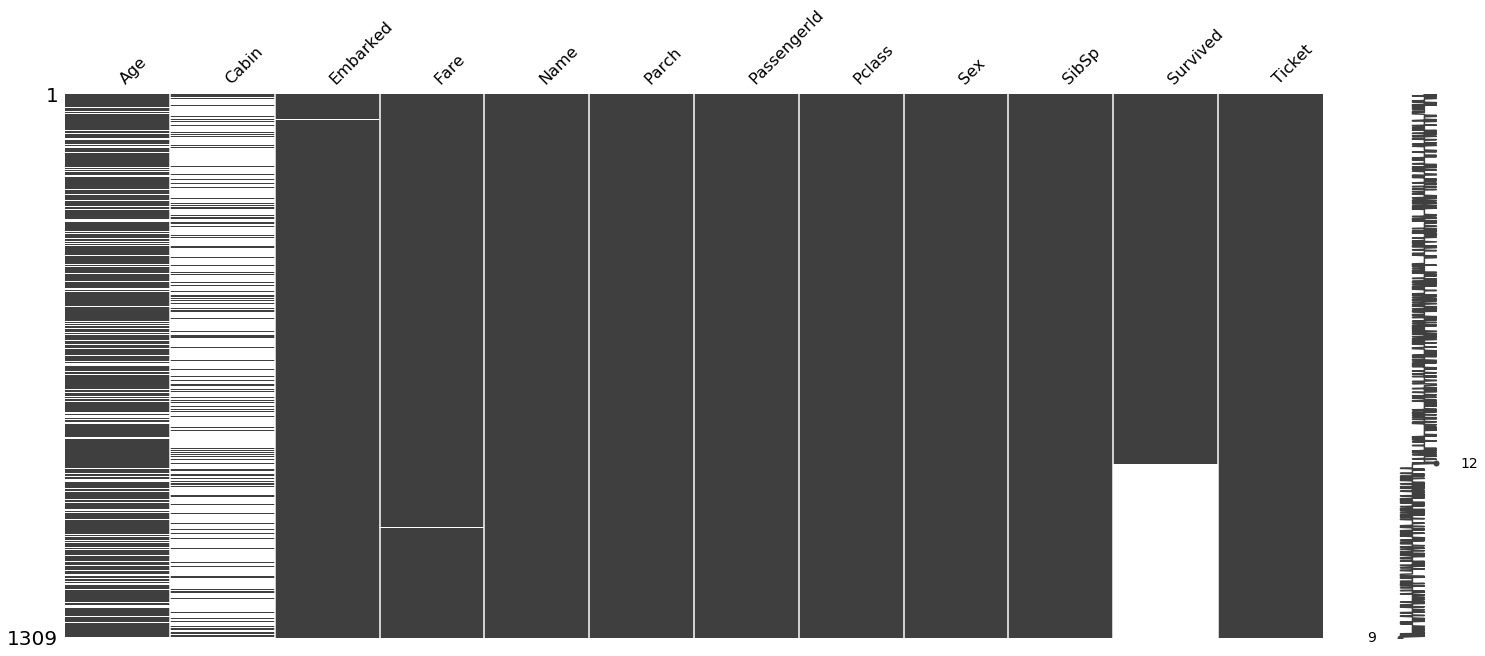

In [10]:
msno.matrix(df)

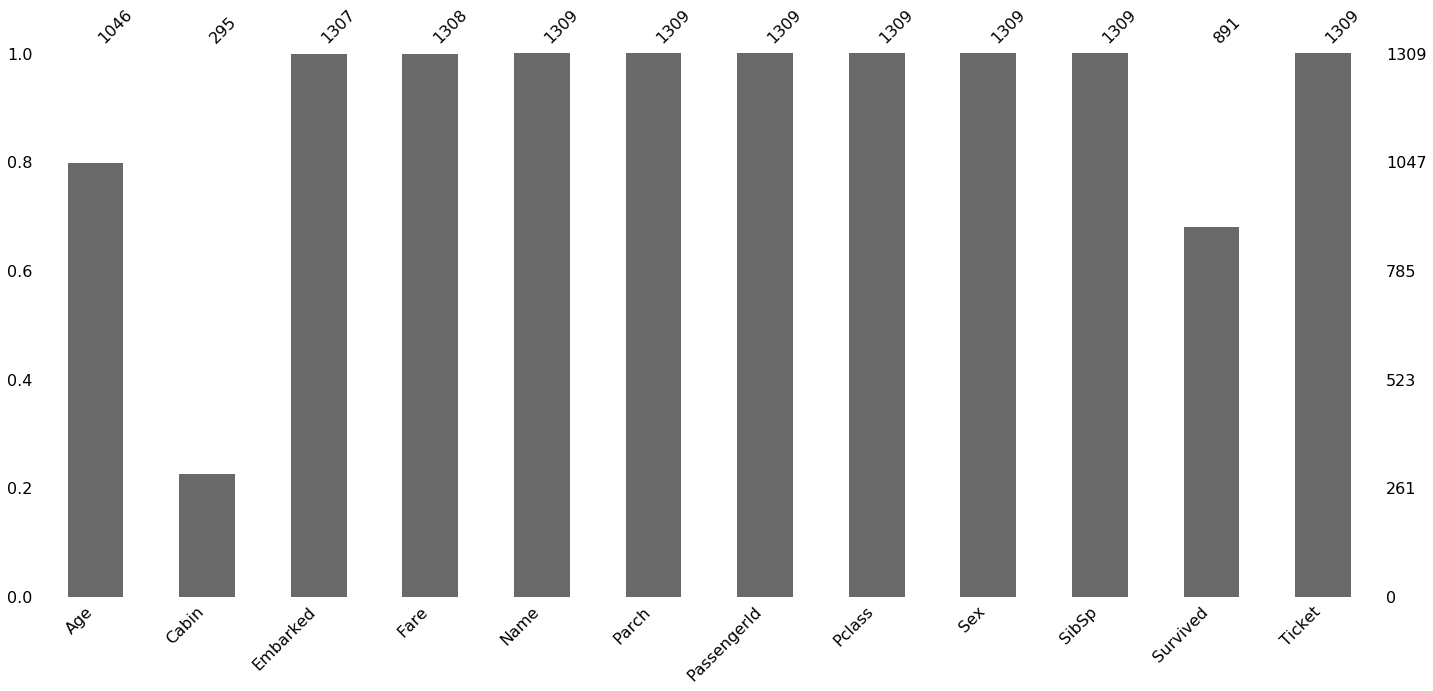

In [11]:
msno.bar(df)

* The distributions of missing data do not seem have any meaning.
* 1. Cabin has too many missing data, so I will delete entire column.
* 2. Embarked will be filled with mode class and Fare will be filled with Median since they do not 

In [12]:
df.drop(columns = ["Cabin"], inplace = True)

df["Fare"].fillna(df["Fare"].median(), inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

df.isnull().sum()

Age            263
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

Ok, no missing data in Fare and Embarked, and no more Cabin column exist.

Age should be treated carefelly. We cannot just substitute with the mode of the all data since age distribution highly depends on the other features as below.

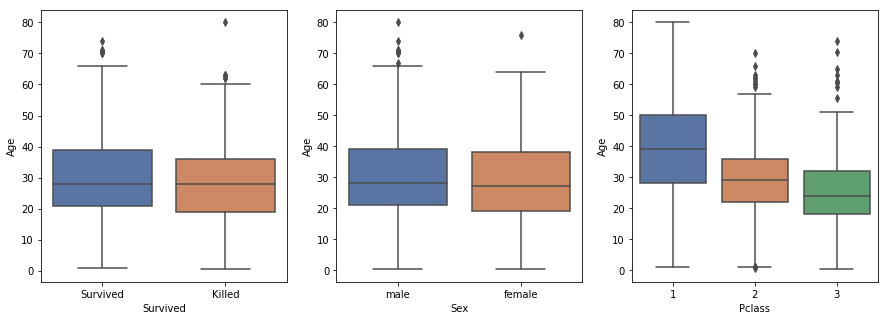

In [13]:
surv_dict = {0:'Survived', 1:'Killed'}
df_age = df.copy()
df_age['Survived'] = df_age['Survived'].map(surv_dict)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

sns.set(palette='deep')
sns.boxplot(x='Survived', y='Age', data=df_age, ax = ax1)
sns.boxplot(x='Sex', y='Age', data=df_age, ax = ax2)
sns.boxplot(x='Pclass', y='Age', data=df_age, ax = ax3)

* I will come back to this when I looked at other features' distributions

In [14]:
df.Embarked.fillna('S', inplace = True)
df_dummies = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
df = pd.concat([df, df_dummies], axis = 1)


* Label encode Sex and Embarked manually
* I will also delete Ticket column as it seems too complecated.

In [15]:

df["is_male"]=(df["Sex"]=="male").astype(int)
df.drop(columns=["Sex"],inplace=True)

emb_dict={"S":0,"C":1,"Q":2}
df["Embarked"]=df["Embarked"].map(lambda x: emb_dict[x])


In [16]:
df.drop(columns=["Ticket"],inplace=True)

In [17]:
df.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,is_male
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,0,0,1,1
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,1,0,0,0
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,0,0,1,0
3,35.0,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,0,0,1,0
4,35.0,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,0,0,1,1
5,NaN,2,8.4583,"Moran, Mr. James",0,6,3,0,0.0,0,1,0,1
6,54.0,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0.0,0,0,1,1
7,2.0,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,3,0.0,0,0,1,1
8,27.0,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,1.0,0,0,1,0
9,14.0,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1.0,1,0,0,0


* I will extract the titles from the names.
* I will also obtain the length of the names.

In [18]:
df["NameTitle"]=df["Name"].str.extract('([A-Za-z]+)\.', expand=True)
df["NameLength"]=df["Name"].map(lambda x: len(x))

In [19]:
df["NameTitle"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Lady          1
Sir           1
Capt          1
Countess      1
Mme           1
Jonkheer      1
Don           1
Dona          1
Name: NameTitle, dtype: int64

* Combine small classes to top ones.

In [20]:
Title_dict = {
    "Mr": "Mr",
    "Ms": "Mrs",
    "Mrs":"Mrs",
    "Mme":"Mrs",
    "Miss": "Miss",
    "Mlle":"Miss",
    "Master": "Master",
    "Lady":"Royalty",
    "Sir":"Royalty",
    "Don": "Royalty",
    "the Countess": "Royalty",
    "Jonkheer":"Royalty",
    "Capt": "Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer"
}
df["NameTitle"] = df["Name"].map(lambda name: name.split(',')[1].split('.')[0].strip())
df["NameTitle"] = df.NameTitle.map(Title_dict)

In [21]:
df["NameTitle"].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Name: NameTitle, dtype: int64

In [22]:
df.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,is_male,NameTitle,NameLength
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,0,0,1,1,Mr,23
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,1,0,0,0,Mrs,51
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,0,0,1,0,Miss,22
3,35.0,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,0,0,1,0,Mrs,44
4,35.0,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,0,0,1,1,Mr,24
5,NaN,2,8.4583,"Moran, Mr. James",0,6,3,0,0.0,0,1,0,1,Mr,16
6,54.0,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0.0,0,0,1,1,Mr,23
7,2.0,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,3,0.0,0,0,1,1,Master,30
8,27.0,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,1.0,0,0,1,0,Mrs,49
9,14.0,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1.0,1,0,0,0,Mrs,35


* Group by Sex, Pclass and NameTitle. Then fill in age with the median of the group.

In [23]:
grouped = df.groupby(['is_male','Pclass','NameTitle'])
grouped_median = grouped.median()
grouped_median = grouped_median.reset_index()[['is_male','Pclass','NameTitle', 'Age']]

In [24]:
grouped_median

,is_male,Pclass,NameTitle,Age
0,0,1,Miss,30.0
1,0,1,Mrs,45.0
2,0,1,Officer,49.0
3,0,1,Royalty,40.5
4,0,2,Miss,20.0
5,0,2,Mrs,30.0
6,0,3,Miss,18.0
7,0,3,Mrs,31.0
8,1,1,Master,6.0
9,1,1,Mr,41.5


In [25]:
def fill_age(row):
    condition = (
        (grouped_median["is_male"]==row["is_male"])&
        (grouped_median["NameTitle"]==row["NameTitle"])&
        (grouped_median["Pclass"]==row["Pclass"])
    )
    if np.isnan(grouped_median[condition]["Age"].values[0]):
        print('true')
        condition = (
            (grouped_median["is_male"]==row["is_male"])&
            (grouped_median["Pclass"]==row["Pclass"])
        )
    return grouped_median[condition]["Age"].values[0]


def process_age():
    global df
    df["Age"] = df.apply(lambda row: fill_age(row) if np.isnan(row["Age"]) else row["Age"], axis = 1)
    return df

df = process_age()

We dont need Names, so I will delete the column here. I will label encode NameTitle.

In [26]:

df.drop("Name", axis = 1, inplace = True)

titles_dummies = pd.get_dummies(df["NameTitle"], prefix = "NameTitle")
df = pd.concat([df, titles_dummies], axis = 1)

df.drop("NameTitle", axis = 1, inplace = True)

In [27]:
df.dtypes

Age                  float64
Embarked               int64
Fare                 float64
Parch                  int64
PassengerId            int64
Pclass                 int64
SibSp                  int64
Survived             float64
Embarked_C             uint8
Embarked_Q             uint8
Embarked_S             uint8
is_male                int64
NameLength             int64
NameTitle_Master       uint8
NameTitle_Miss         uint8
NameTitle_Mr           uint8
NameTitle_Mrs          uint8
NameTitle_Officer      uint8
NameTitle_Royalty      uint8
dtype: object

<br><br>
<a id='2'></a>
# 2. Feature engineering

## 2.1 Looking at the correlations

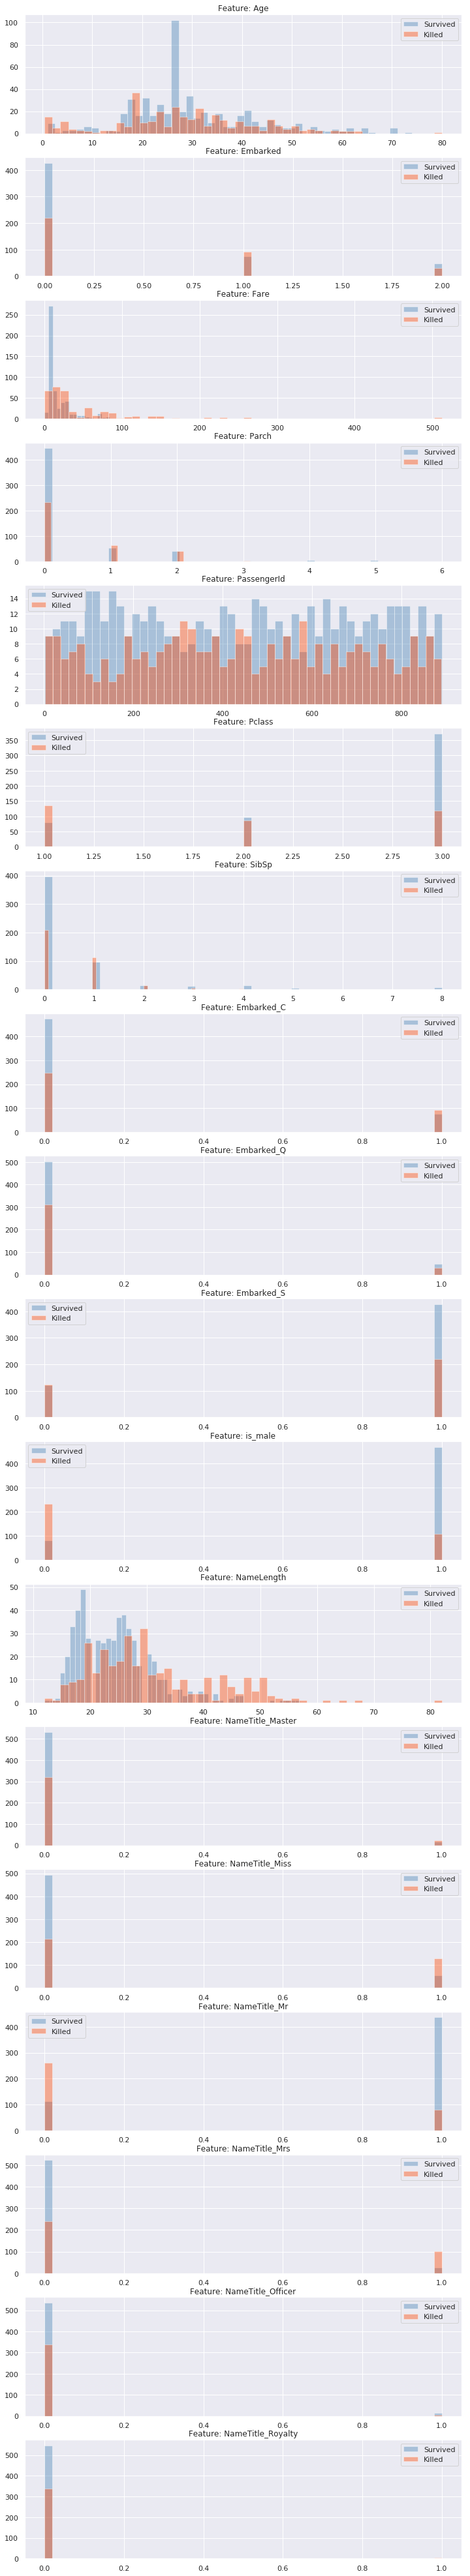

In [28]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(columns=["Survived"])):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df["Survived"]==0], bins=50, color="steelblue", kde = False)
    sns.distplot(df[cn][df["Survived"]==1], bins=50, color="orangered", kde = False)
    ax.legend(['Survived', 'Killed'])
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
plt.show()

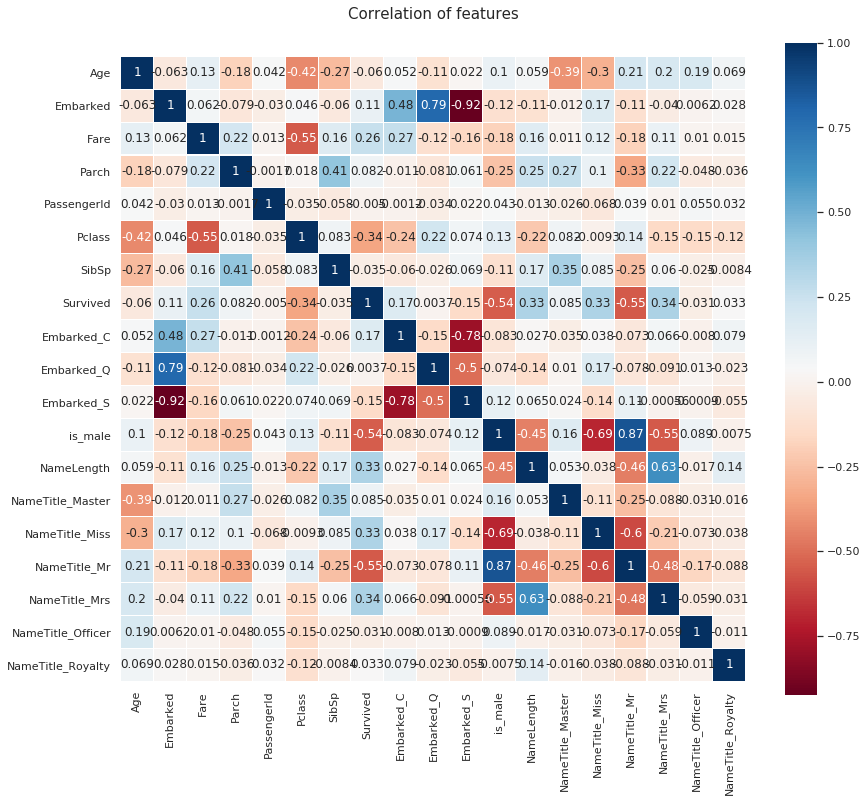

In [29]:

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of features', y=1.05, size=15)
sns.heatmap(df[df["PassengerId"]<892].astype(float).corr(), linewidths=0.1,cmap=colormap, vmax=1.0, square=True, annot=True)

In [30]:
cori = []
for col in df.columns:
    print(col,'     ', df[col].dtypes)
    cori.append([col, df[col].corr(df['Survived'])])
df_cor = pd.DataFrame(sorted(cori, key = lambda x: abs(x[1]), reverse = True), columns = ['feature', 'corr'])

Age       float64
Embarked       int64
Fare       float64
Parch       int64
PassengerId       int64
Pclass       int64
SibSp       int64
Survived       float64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
is_male       int64
NameLength       int64
NameTitle_Master       uint8
NameTitle_Miss       uint8
NameTitle_Mr       uint8
NameTitle_Mrs       uint8
NameTitle_Officer       uint8
NameTitle_Royalty       uint8


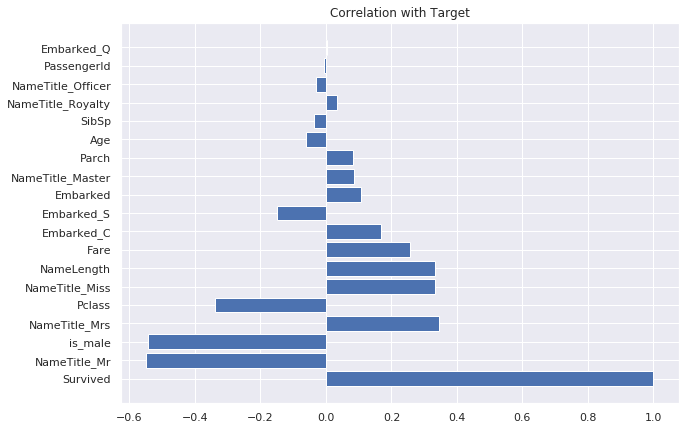

In [31]:
plt.figure(figsize=(10, 7))
plt.barh(df_cor['feature'], df_cor['corr'])
plt.title("Correlation with Target")
plt.show()

- Sex related features (Name_title_Mr, is_male) have strong correlations.
- 

## 2.2 Adding Features

In [32]:

# 16才以下なら1
age_labels  = [0,1,2]
df['Age_bin'] = pd.cut(df['Age'],[0, 16, 58, 80] , labels=age_labels)


#運賃が40以下なら1
df["is_cheap"]=0
df.loc[df["Fare"]<40,"is_cheap"]=1



* Add family size from Parch and SibSp
* Mark single person

In [33]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['single'] = 0
df.loc[df['FamilySize'] == 1, 'single'] = 1

In [34]:
df.head(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,...,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Officer,NameTitle_Royalty,Age_bin,is_cheap,FamilySize,single
0,22.0,0,7.2500,0,1,3,1,0.0,0,0,...,0,0,1,0,0,0,1,1,2,0
1,38.0,1,71.2833,0,2,1,1,1.0,1,0,...,0,0,0,1,0,0,1,0,2,0
2,26.0,0,7.9250,0,3,3,0,1.0,0,0,...,0,1,0,0,0,0,1,1,1,1
3,35.0,0,53.1000,0,4,1,1,1.0,0,0,...,0,0,0,1,0,0,1,0,2,0
4,35.0,0,8.0500,0,5,3,0,0.0,0,0,...,0,0,1,0,0,0,1,1,1,1
5,26.0,2,8.4583,0,6,3,0,0.0,0,1,...,0,0,1,0,0,0,1,1,1,1
6,54.0,0,51.8625,0,7,1,0,0.0,0,0,...,0,0,1,0,0,0,1,0,1,1
7,2.0,0,21.0750,1,8,3,3,0.0,0,0,...,1,0,0,0,0,0,0,1,5,0
8,27.0,0,11.1333,2,9,3,0,1.0,0,0,...,0,0,0,1,0,0,1,1,3,0
9,14.0,1,30.0708,0,10,2,1,1.0,1,0,...,0,0,0,1,0,0,0,1,2,0


<br><br>
<a id='3'></a>
# 3. Train model and Predict


In [35]:
train = df[df["PassengerId"] < 892]
test = df[df["PassengerId"] >= 892].drop(columns="Survived")

In [36]:
train.shape

(891, 23)

In [37]:
test.shape

(418, 22)

In [38]:
import numpy as np

train_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived"]))
train_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived"]))
test_y = np.array(train[train["PassengerId"]>600]["Survived"])


#### Visualize with decision tree
- On local 

In [39]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_X, train_y)
dc_pred_y = dc.predict(test_X)

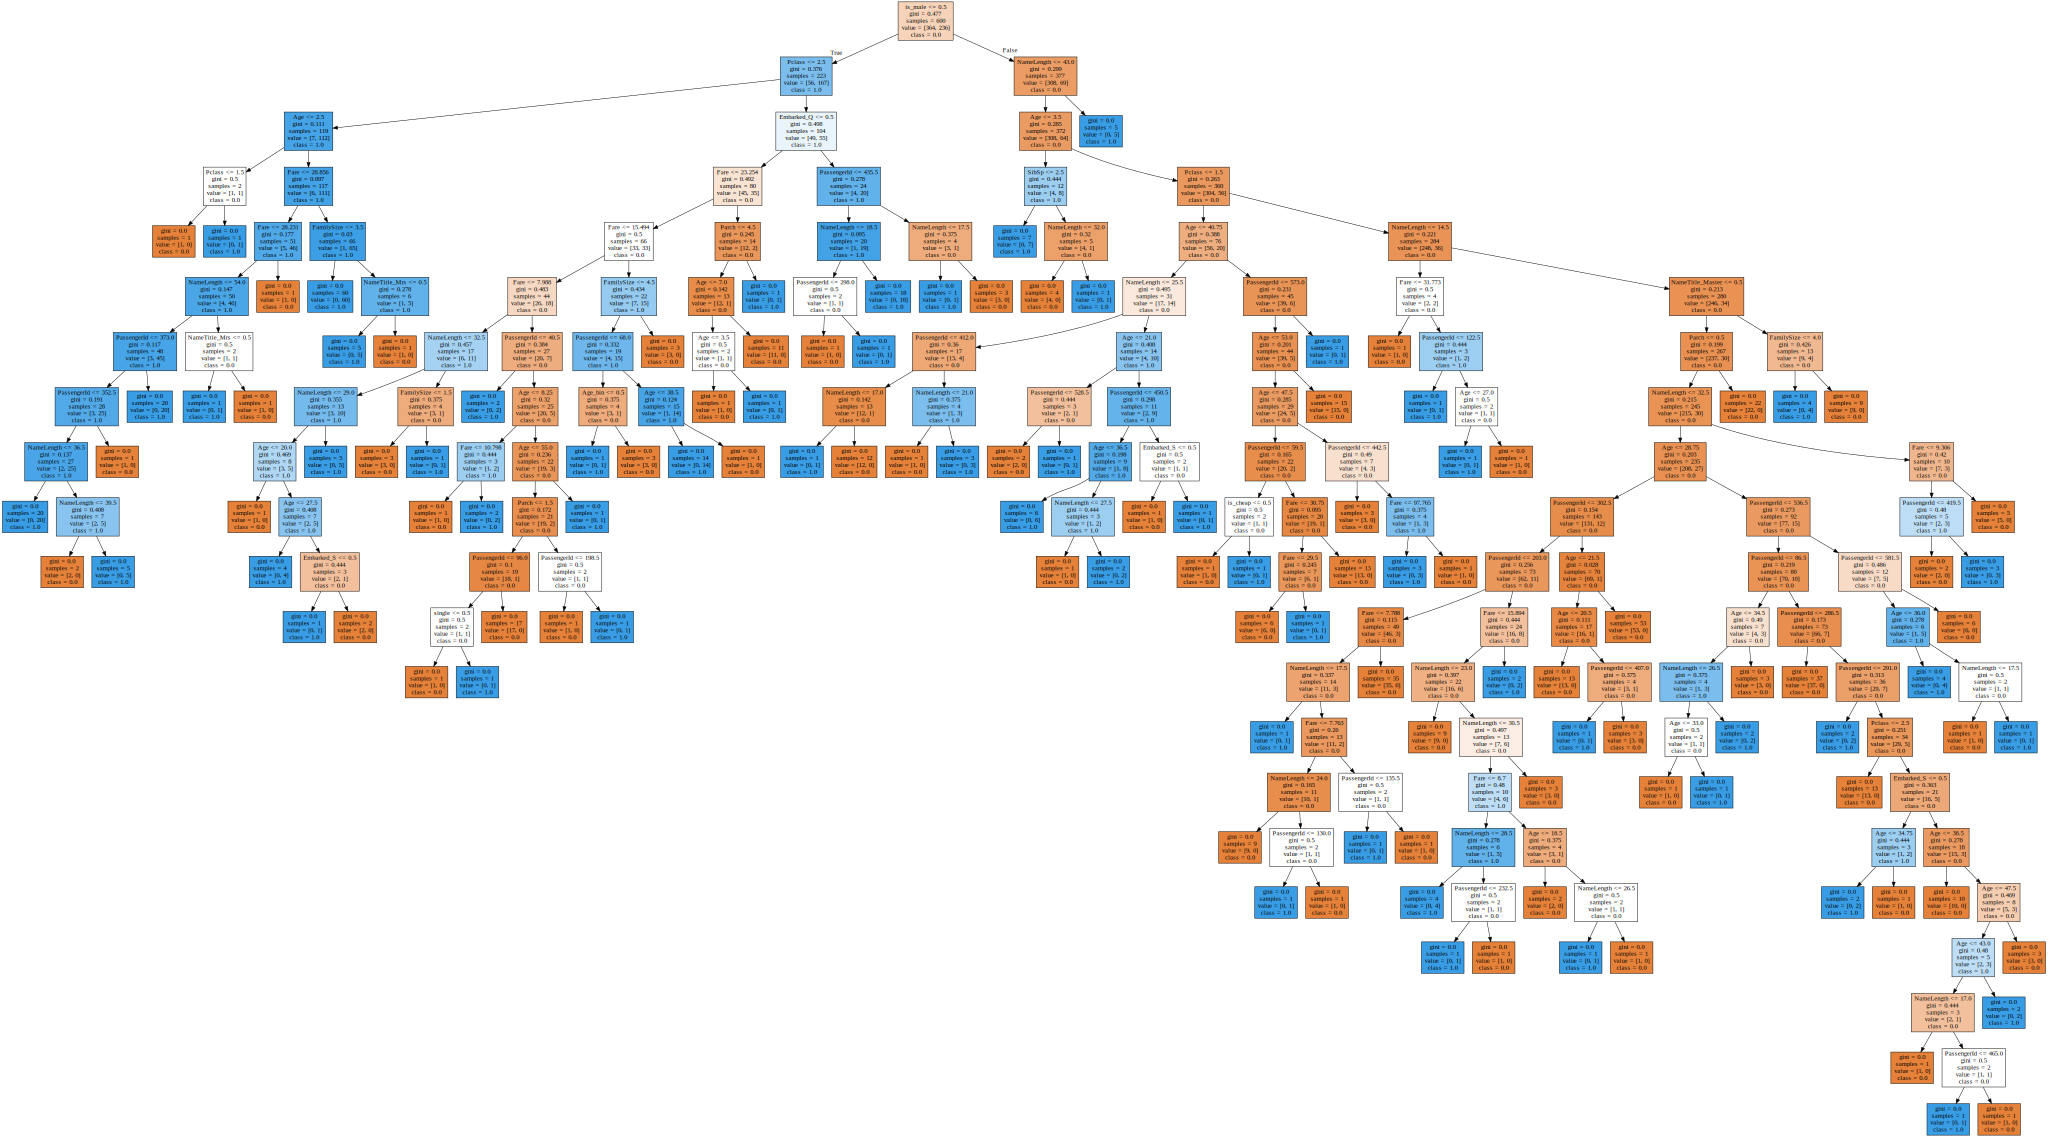

In [40]:
import sklearn.tree as tree
import graphviz
dt_feature_names = list(df.drop('Survived', inplace = False, axis = 1).columns)
dt_target_names = [str(s) for s in df['Survived'].unique()]
dot_data = tree.export_graphviz(dc, feature_names=dt_feature_names, class_names=dt_target_names, filled=True, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

- Name length and Pclass are affecting strongly.
- Age also seems quite relevant.

### Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,   max_depth=10, n_jobs = -1, random_state=100)

In [42]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_y,test_y)

0.8591065292096219

### XGboost

In [44]:
from xgboost import XGBClassifier

xgc = XGBClassifier(n_estimators=100, max_depth=10, random_state=100, eta=0.5)

xgc.fit(train_X,train_y)
pred_y = xgc.predict(test_X)
accuracy_score(pred_y,test_y)

0.8591065292096219

* XGBoost performed better. I will tune the parameters with grid search.

### + Grid Search 

In [45]:
from sklearn.model_selection import cross_val_score
def cross_val(rfc):
    scores = cross_val_score(rfc, train_X, train_y, cv=10, scoring = "accuracy")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# grid_param = {
#     'num_boost_round': [100, 250, 500],
#     'eta': [0.05, 0.1, 0.3],
#     'max_depth': [6, 9, 12],
#     'subsample': [0.9, 1.0],
#     'colsample_bytree': [0.9, 1.0],
    
#     }

grid_param = {
     'num_boost_round': [100],
     'eta': [0.05],
     'max_depth': [10],
     'subsample': [1.0],
     'colsample_bytree': [1.0],
     
    
    }


Xgb = XGBClassifier()
cv = GridSearchCV(Xgb, grid_param, cv = 5, scoring='f1',n_jobs =-1,verbose=True)
cv.fit(train_X,train_y)
print(cv.best_params_, cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'colsample_bytree': 1.0, 'eta': 0.05, 'max_depth': 10, 'num_boost_round': 100, 'subsample': 1.0} 0.7284431911021976


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [47]:
Xgb2 = XGBClassifier(**cv.best_params_)
Xgb2.fit(train_X,train_y)
pred_y = Xgb2.predict(test_X)

accuracy_score(pred_y,test_y)

0.8556701030927835

* This gives the best score.

<a id='4'></a>
# 4. Submit

In [48]:
train_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived"]))
train_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived"]))
test_y = np.array(train[train["PassengerId"]>600]["Survived"])


train_X = np.array(train.drop(columns=["Survived"]))
train_y = np.array(train["Survived"])

test_X = np.array(test)

In [49]:
Xgb2.fit(train_X,train_y)
pred_y = Xgb2.predict(test_X)

ans = test.loc[:,["PassengerId"]]
ans["Survived"] = pd.Series(pred_y).astype(int)
ans.to_csv("submission_final.csv",index=False)